# **Gradient Descent Lecture**

Our problem is to find a point within set of points that has the minimum distance between all other points  

**Steps of GD**


1.   Define you loss function, Mathimatically
2.   Calculate the gradients of loss w.r.t function parameters that lead to optimize
3. Initialize your parameters
4. Iteratively, update your parameters based on where you 're now (by seeing the gradient at this location).

You either take a step forward with the gradient (update the parameter by a determined step in direction of gradient), or take a step backward (update the parameter by a determined step in the negative direction of gradient)



# Generate Data

In [ ]:
from random import Random
seed=5 # TO MAKE THE DATA GENERATED RANDOM BUT REPRODUCABLE
random_generator= Random(x=seed) # this gives an object of pesudo random numbers generator
#sequence of random number generator keep constant

x_data= [random_generator.uniform(a=0, b=1) for _ in range(100)]
y_data= [random_generator.uniform(a=0, b=1) for _ in range(100)]

In [ ]:
#Look The Difference Between Two Functions

#Random class generates 1st random point into x and 2nd random point in y and so on
def generate_pnts(N):
  datax, datay= [],[]
  for _ in range(N):
    datax.append(random_generator.uniform(0,1))
    datay.append(random_generator.uniform(0,1))
  return datax, datay

x,y= generate_pnts(100)
print(x[:10]); print( y[:10])

#Here, 1st N random points all goes to x, then another N random points all goes to y
def generate_pnts_lst_comp(N):
  return [random_generator.uniform(0,1) for _ in range(N)] , [random_generator.uniform(0,1) for _ in range(N)]

x,y= generate_pnts_lst_comp(100)
print(x[:10]); print( y[:10])


[0.219038164310136, 0.6308651620035047, 0.47158550455987414, 0.05414301076389738, 0.31735084182009476, 0.19336010179162577, 0.4653301637701678, 0.6117939507363511, 0.23784640966367143, 0.0006606157907871335]
[0.6859572319726135, 0.04186170538118772, 0.22624259565580995, 0.133526884845114, 0.18154721321658684, 0.03565755050994279, 0.38029885040614, 0.590164402159797, 0.9031823230833629, 0.4053757485159233]
[0.5939742584042348, 0.2385850950319477, 0.8769266490834619, 0.48046793016270206, 0.32328623613397656, 0.79646358289348, 0.029460978076613187, 0.7250066577242273, 0.053659192087078145, 0.1508010621713064]
[0.5484162780310088, 0.9896055671369068, 0.5189399612337399, 0.3500133003257563, 0.09381466147702944, 0.07121836570646711, 0.8987919599055768, 0.49116020718177145, 0.9357362201159075, 0.053761487325957535]


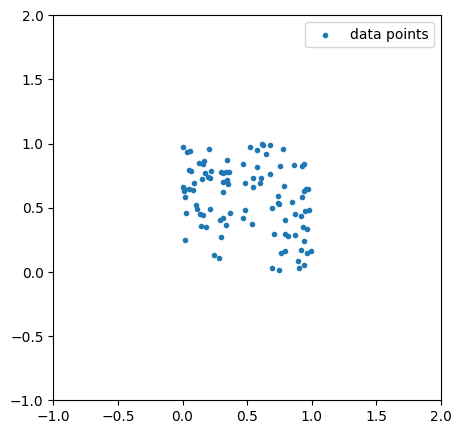

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize= (5,5))
ax=fig.add_subplot(1,1,1) # add_subplot(no_of_rows, no_of_columns, index_of_cell) it make a table of cells (each cell has a subplot). it moves row by row
ax.scatter(x_data, y_data, marker='.', label='data points')
ax.set_xlim(left=-1, right=2)
ax.set_ylim(bottom=-1, top=2)
plt.legend()
plt.show()

# Loss Function
we want to find the point that has minimum distance with all other points.


In [ ]:
from math import sqrt
def loss(xp, yp):
  N= len(x_data)
  return sum([((xp-x_data[i])**2 + (yp-y_data[i])**2)**0.5 for i in range(N)]) / N
# Another synatx of loss function
loss_2= sum([sqrt((xi-xp)**2+(yi-yp)**2)
             for xi,yi in zip(x_data, y_data)]) /N



Note that your implementation of the loss function is not effcient, as you take unnecessary space in memory to make the summation of a list. You can simply update the summation for each datapoint instead of doing a list.

# Visualize Loss Function

In [ ]:
step=0.01
mesh_size=300
mesh_x=[-1+i*step for i in range(mesh_size)]
mesh_y=[-1+i*step for i in range(mesh_size)]
mesh_loss= [
    [loss(x_curr, y_curr) for x_curr in mesh_x]
    for y_curr in mesh_y
]

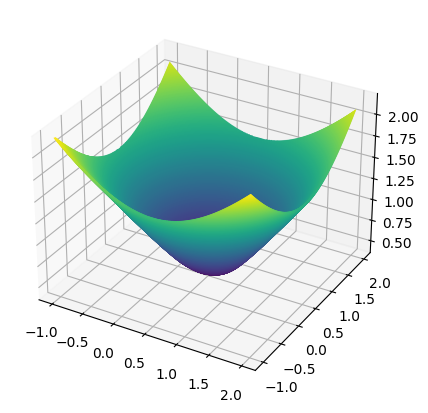

In [ ]:
fig= plt.figure(figsize= (5,5))
ax= fig.add_subplot(1,1,1, projection='3d')
ax.contour(mesh_x, mesh_y, mesh_loss, levels=500)
fig.show()

# Numerical Conceptulization of derrivatives "Formal Defintion"
#Finite Difference Method
we will calculate the gradient numerically to reach the minima by going opposite to the gradient

In [ ]:
#initialize arbitrary values for arguments xp, yp
xp, yp = 0.5,0.5
EPOCHS= 1000
H= 0.0001
DELTA=0.001
losses_across_epochs=[]
for _ in range(EPOCHS):
  lossfunc= loss(xp,yp)
  losses_across_epochs.append(lossfunc)
  #calculate the gradients, partial derrivate of loss with args x, y
  dLoss_dx= (loss(xp+H,yp)- lossfunc) /H
  dLoss_dy=(loss(xp,yp+H)- lossfunc)/H
  #update xp, yp according to the gradient **SIMULTANEOUSLY**
  #move a small step in a direction opposite to the gradient iteratively and conservatively (same DELTA)
  xp-=DELTA* dLoss_dx
  yp-=DELTA* dLoss_dy

print(xp,yp)




0.4812100049585989 0.589301019305984


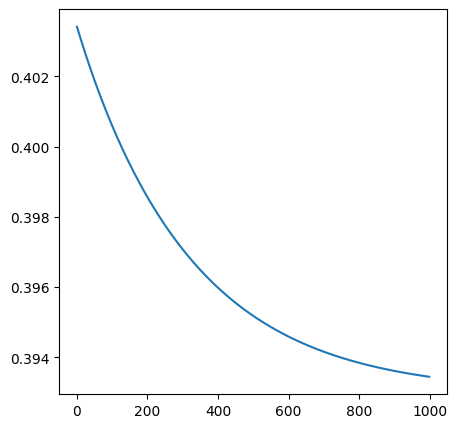

In [ ]:
fig= plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
ax.plot(losses_across_epochs)
plt.show()

#Calculate the gradient by definite equation "Mathimatical closed form of the gradient" instead of using Limit "approximate solution"

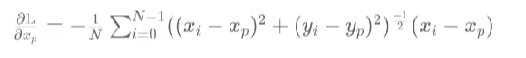

In [ ]:
def calc_gradient(xp,yp, data_x= x_data, data_y= y_data, N=len(x_data)):
  dl_dx, dl_dy=0,0
  for xi,yi in zip(data_x, data_y):
    #calculate gradients
    term= ((xi-xp)**2 +(yi-yp)**2)**-0.5
    dl_dx += term*(xi-xp)
    dl_dy += term*(yi-yp)
  return (-1*dl_dx)/N ,(-1*dl_dx)/N




In [ ]:
#Optimization LOOP
xp, yp = 2 , 2
EPOCHS= 500
DELTA=.01
losses_across_epochs=[]
for _ in range(EPOCHS):
  loss_func= loss(xp,yp)
  losses_across_epochs.append(loss_func)

  dl_dx,dl_dy= calc_gradient(xp,yp)

  #update the parameters
  xp-=DELTA* dl_dx
  yp-=DELTA* dl_dy
print(xp,yp)

0.4815549469327129 0.4815549469327129


In [ ]:
#is_close fucntion by numpy to compare the output numerical data of different methods for same problem. It compares them up to a certain tolerance.
#Don't expect them to be eaxactly the same as ML engineer.

# Stochastic Gradient Descent

**use stochastic batches of data to calculate gradient and update the weights**

In [ ]:
#optimizarion loop
SEED= 5
sampler= Random(x=SEED)
DELTA=1e-2

xp,yp= 0.2,0.2
pnts_num= len(x_data)
EPOCHs= 1000  # number of times to visit the WHOLE dataset
Batch_SIZE= 4  #number of points contibuting to calculating gradient estimate in one update
no_of_batches= int(pnts_num/Batch_SIZE)
indices= [i for i in range(pnts_num)]

losses=[]
for _ in range(EPOCHS):
  sampler.shuffle(indices)
  for batch in range(no_of_batches):
    batch_indices= indices[batch*Batch_SIZE:(batch+1)*Batch_SIZE]
    batch_x= [x_data[i] for i in batch_indices]
    batch_y= [y_data[i] for i in batch_indices]
    grad_x, grad_y= calc_gradient(xp,yp, batch_x, batch_y,Batch_SIZE)
    xp -= DELTA*grad_x
    yp -= DELTA*grad_y
    losses.append(loss(xp,yp))



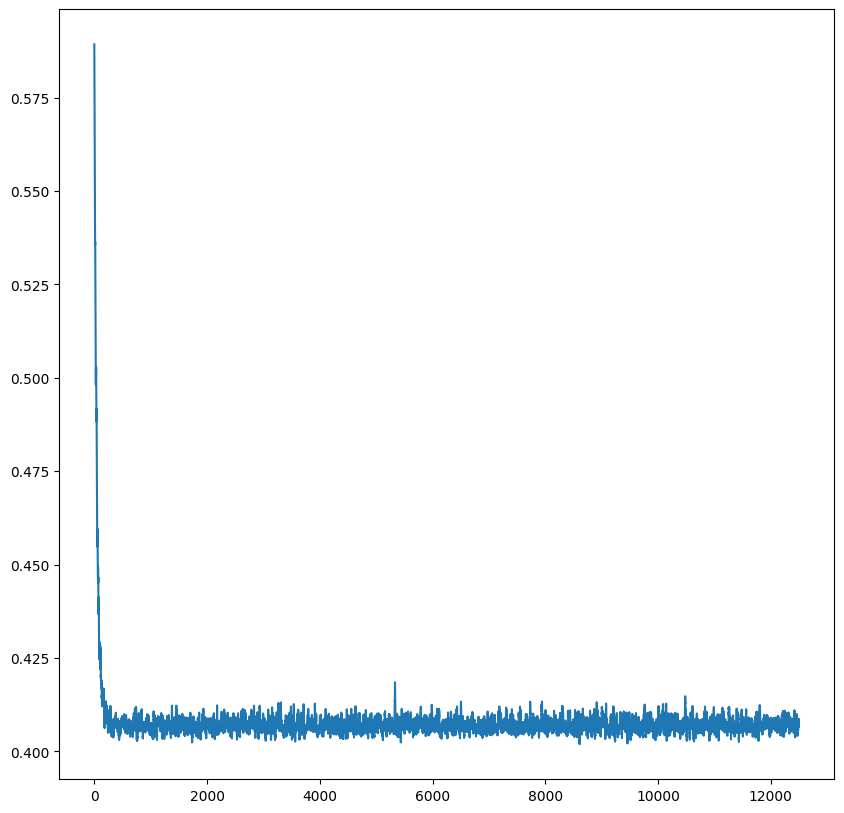

In [ ]:
#plot SGD
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.plot(losses)
#ax.set_xlim(100,200)
#ax.set_ylim(0.4,0.42)

#Faster Convergence Achieved!!
Faster but noisy as estimation is built upon small set of points rather than the whole dataset


as delta increase, SGD become more noisy and too bad and maynot converge

as batch size increases, SGD noise lowers as it's now contributed by more points

In [ ]:
#For Both GD and SGD, we are actually and literally going against direction of the gradient
#CODE HERE

# Automatic calculation of GD by SciPy Python Package

Scipy is a scientific python library used for optimization, integration, linear algebra computation problems.

Here, "optimize" module of scipy is used to get minima of a function. It solves the problem using optimization algorithms rather than gradient descent. If a specific method is not specified: the default method for unconstrained optimization problems is the **BFGS** algorithm, which is a gradient-based method that iteratively approximates the Hessian matrix of the objective function.

In [ ]:
import numpy as np
import scipy as sp
#it takes instance of the function to be optimized, and the initial guess of the parameters.
result= sp.optimize.minimize(loss , np.array([2]), np.array([2]))

In [ ]:
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.4620661288549628
        x: [ 4.817e-01]
      nit: 6
      jac: [ 2.980e-08]
 hess_inv: [[ 1.491e+00]]
     nfev: 14
     njev: 7


#Calculation of Loss and GD by Pytorch

Here, we will deal with data by tesnors.

Vectorization concept is applied, i.e., we do operations on entire arrays or tensors rather than on individual elements

In [ ]:
import torch

In [ ]:
data_torch= torch.tensor([x_data, y_data])
print(data_torch.shape)

torch.Size([2, 100])


In [ ]:
data_torch.ndim

2

In [ ]:
data_torch= data_torch.t()
#shape= 100*2

In [ ]:
loss_torch= lambda pnt, data_torch: torch.sqrt(((pnt-data_torch)**2).sum(dim=1)).sum(dim=0)/data_torch.shape[0]

pnt is broadcasted **automatically** to be of shape (1000,2) instead of (2) such like data(1000,2)

There are Broadcasting Semantics. There are rules that allows the automatic broadcasting

**Time taken when using tensors compared by time taken when used data in lists Just standard library python**

In [ ]:
#Do x_mesh, y_mesh, loss_mesh again

from time import monotonic

x_mesh= torch.arange(-1,2,0.01)
y_mesh= torch.arange(-1,2,0.01)
#print(x_mesh.shape)
start_time= monotonic()
loss_mesh= [
    [loss_torch(torch.tensor([xp,yp]),data_torch) for xp in x_mesh ]
            for yp in y_mesh]
print((monotonic()-start_time)*1000) # result by milli-sec

5509.494975000052


# Vectorization:
We can use it to make computation much faster.

It refers to performing operations on entire arrays or tensors rather than on individual elements. Sp, no list comprehension will be used.